In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Tworzenie funkcji przynależności

In [2]:
velocity = ctrl.Antecedent(np.arange(80, 161, 1), 'velocity')
distance = ctrl.Antecedent(np.arange(10, 101, 1), 'distance')
danger = ctrl.Consequent(np.arange(0, 101, 1), 'danger', defuzzify_method='centroid')

velocity.automf(3, names=['mala', 'srednia', 'duza'])
distance.automf(5, names=['bmaly', 'maly', 'sredni', 'duzy', 'bduzy'])
danger.automf(5, names=['bmale', 'male', 'srednie', 'duze', 'bduze'])

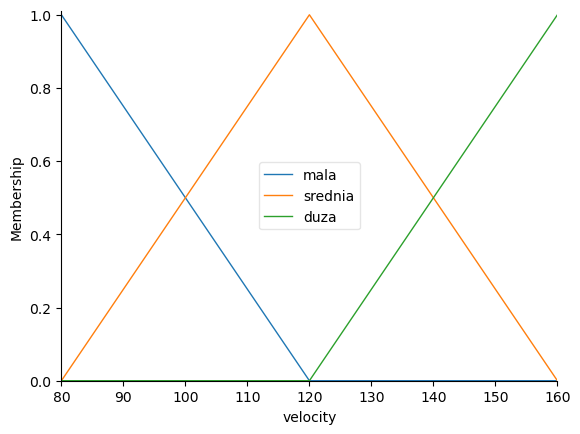

In [11]:
velocity.view()

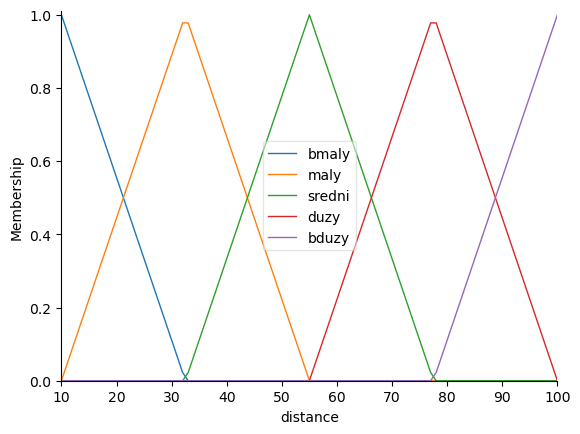

In [4]:
distance.view()

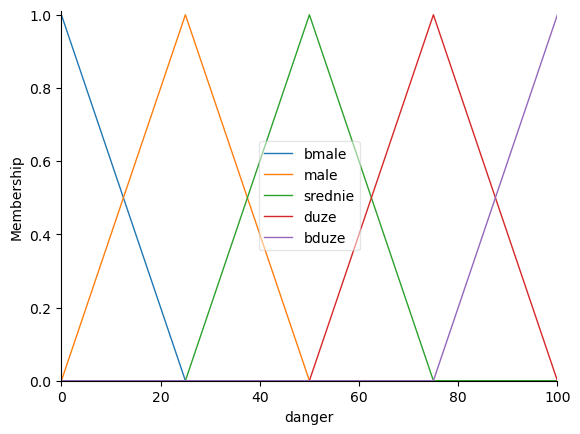

In [5]:
danger.view()

# Baza reguł

Tworzenie reguł zostało oparte na przepisie mówiącym o minimalnej odległości na autostradzie wynoszącej 1/2 prędkości pojazdu. Założono, że wtedy stwarzane zagrożenie jest małe.

In [6]:
rule1 = ctrl.Rule(velocity['mala'] & distance['bmaly'], danger['srednie'])
rule2 = ctrl.Rule(velocity['mala'] & distance['maly'], danger['male'])
rule3 = ctrl.Rule(velocity['mala'] & distance['sredni'], danger['male'])
rule4 = ctrl.Rule(velocity['mala'] & distance['duzy'], danger['bmale'])
rule5 = ctrl.Rule(velocity['mala'] & distance['bduzy'], danger['bmale'])
rule6 = ctrl.Rule(velocity['srednia'] & distance['bmaly'], danger['duze'])
rule7 = ctrl.Rule(velocity['srednia'] & distance['maly'], danger['srednie'])
rule8 = ctrl.Rule(velocity['srednia'] & distance['sredni'], danger['male'])
rule9 = ctrl.Rule(velocity['srednia'] & distance['duzy'], danger['bmale'])
rule10 = ctrl.Rule(velocity['srednia'] & distance['bduzy'], danger['bmale'])
rule11 = ctrl.Rule(velocity['duza'] & distance['bmaly'], danger['bduze'])
rule12 = ctrl.Rule(velocity['duza'] & distance['maly'], danger['duze'])
rule13 = ctrl.Rule(velocity['duza'] & distance['sredni'], danger['srednie'])
rule14 = ctrl.Rule(velocity['duza'] & distance['duzy'], danger['male'])
rule15 = ctrl.Rule(velocity['duza'] & distance['bduzy'], danger['male'])

In [7]:
danger_ctrl = ctrl.ControlSystem(
    [rule1, rule2, rule3, rule4, rule5, rule6, rule7,
     rule8, rule9, rule10, rule11, rule12, rule13,
     rule14, rule15]
)

# Przykłady

Przykładowe dane wejściowe. Do defuzyfikacji użyto metody środka ciężkości.

In [8]:
vel = [100, 120, 150]
dis = [90, 60, 30]
dgs = []

for i in range(3):
    dg = ctrl.ControlSystemSimulation(danger_ctrl)
    dg.input['velocity'] = vel[i]
    dg.input['distance'] = dis[i]
    dg.compute()
    dgs.append(dg)

9.72
24.41
67.93


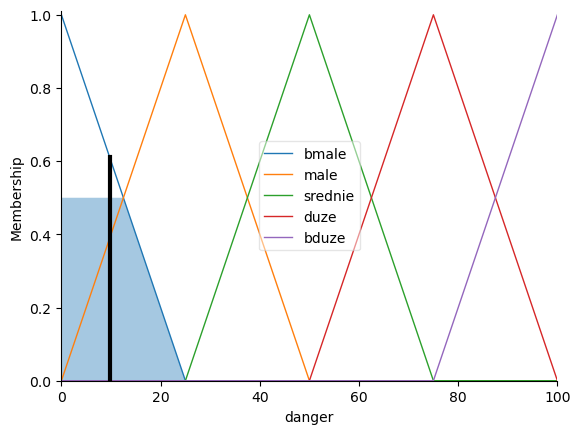

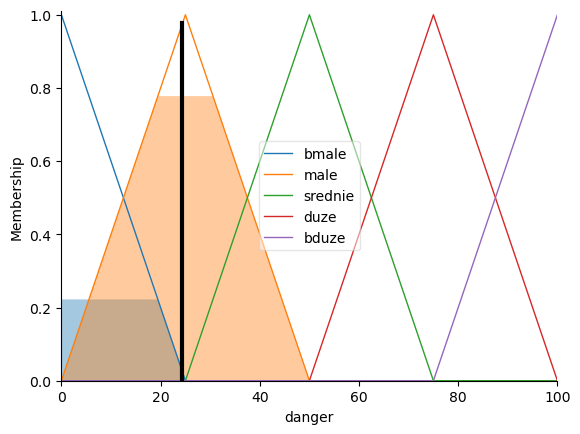

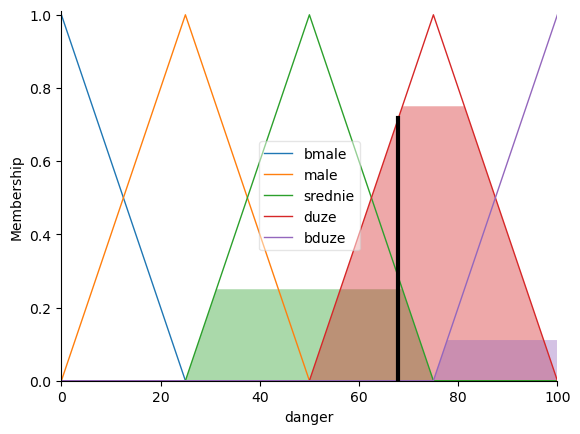

In [9]:
for dg in dgs:
    print(round(dg.output['danger'], 2))
    danger.view(sim=dg)

# Wykres przestrzenny

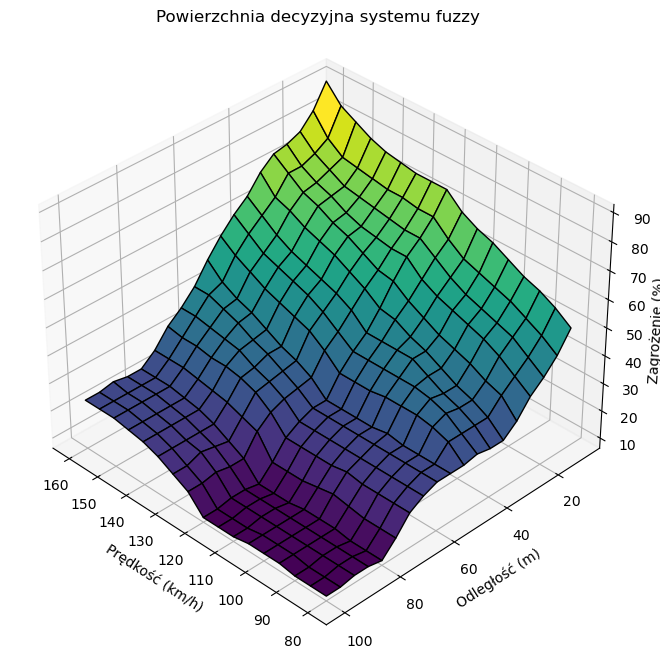

In [10]:
from mpl_toolkits.mplot3d import Axes3D

vel_vals = np.arange(80, 161, 5)
dis_vals = np.arange(10, 101, 5)
X, Y = np.meshgrid(vel_vals, dis_vals)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        dg.input['velocity'] = X[i, j]
        dg.input['distance'] = Y[i, j]
        try:
            dg.compute()
            Z[i, j] = dg.output['danger']
        except:
            Z[i, j] = np.nan

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k')
ax.view_init(elev=35, azim=135)
ax.set_xlabel('Prędkość (km/h)')
ax.set_ylabel('Odległość (m)')
ax.set_zlabel('Zagrożenie (%)')
ax.zaxis.labelpad = 0
ax.set_title('Powierzchnia decyzyjna systemu fuzzy')

plt.show()